## Version 1: use all the featrues containing "fband" (theory driven frequency band ranges) and "absmean" (+ the other feautres starting with  and "eyesclosed_fooof_" and the feature  eyesclosed_alphapeak_max_freq)

In [1]:
cd ../pipelines

/Users/pldelacour/Documents/PL_Ecole/data_sc_lab/data_sc_lab/task_01/pipelines


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.tool_functions import *
from yellowbrick.regressor import AlphaSelection

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')#, nrows=1000)

df_psd_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv") #, nrows=1000)
df_psd_channel = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Channel.csv") #, nrows=5)
df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv") #, nrows=1000)
df_spectro_channel = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Channel.csv") #, nrows=5)

df_microstate = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv") #, nrows=5)

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,11

In [4]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "DX_01_Cat"]]
y_labels_healthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == True]

y_labels = y_labels[["Patient_ID", "Age"]]
y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]
y_labels_healthy

,Patient_ID,Age
9,NDARCF462HNM,14.216632
11,NDARFC233RND,9.153661
22,NDARDT800YVF,17.510381
25,NDARZT011LBZ,7.760209
26,NDARKV482FU9,10.977298
...,...,...
2088,NDARAV069HGT,13.896189
2089,NDARZC497BFU,17.419917
2090,NDARDZ737LG9,13.031143
2094,NDARRT283RHB,10.712069


In [5]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)
print("Original lengths: " + str(len(df_psd_cluster)) + "(psd), " + \
     str(len(df_spectro_cluster)) + "(spectro), " + str(len(df_microstate)) + "(micro)")

# Aggregate with label
df_label_psd_cluster = pd.merge(y_labels_healthy, df_psd_cluster, on='Patient_ID')
df_label_spectro_cluster = pd.merge(y_labels_healthy, df_spectro_cluster, on='Patient_ID')
df_label_microstate = pd.merge(y_labels_healthy, df_microstate, on='Patient_ID')
print("Only healthy people, resulting lengths: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

# Drop NaN values
df_label_psd_cluster = fill_with_median(df_label_psd_cluster)
df_label_spectro_cluster = fill_with_median(df_label_spectro_cluster)
df_label_microstate = fill_with_median(df_label_microstate)
print("Replace NaN by median, resulting lenghts: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

Original lengths: 1485(psd), 1485(spectro), 1108(micro)
Only healthy people, resulting lengths: 174(psd), 174(spectro), 128(micro)
Replace NaN by median, resulting lenghts: 174(psd), 174(spectro), 128(micro)


In [6]:
test_ratio = 0.2

In [109]:
df_label_spectro_cluster

,Patient_ID,Age,eyesclosed_fband_delta_absmean_lfront,eyesclosed_fband_delta_absmean_mfront,eyesclosed_fband_delta_absmean_rfront,eyesclosed_fband_delta_absmean_lpari,eyesclosed_fband_delta_absmean_mpari,eyesclosed_fband_delta_absmean_rpari,eyesclosed_fband_delta_relmean_lfront,eyesclosed_fband_delta_relmean_mfront,...,eyesopen_fooof_peak_freq_rfront,eyesopen_fooof_peak_freq_lpari,eyesopen_fooof_peak_freq_mpari,eyesopen_fooof_peak_freq_rpari,eyesopen_fooof_peak_amplitude_lfront,eyesopen_fooof_peak_amplitude_mfront,eyesopen_fooof_peak_amplitude_rfront,eyesopen_fooof_peak_amplitude_lpari,eyesopen_fooof_peak_amplitude_mpari,eyesopen_fooof_peak_amplitude_rpari
0,NDARYP516VUU,10.758156,3.736577,5.970049,3.462826,4.225793,6.973617,6.719936,5.615468,6.878523,...,10.750797,10.401234,10.783732,11.046665,0.821805,0.784304,0.770845,0.914380,0.671399,1.004923
1,NDARMW252AJW,14.353639,1.046030,0.993709,0.171848,0.340939,0.820232,1.192685,8.556849,8.801300,...,4.946944,4.752440,11.130275,11.116105,0.482187,0.246096,0.453385,0.387212,0.482681,0.445570
2,NDARNT939YMG,13.436344,0.598047,0.989073,0.653203,0.398997,0.747339,0.464198,6.277626,6.457210,...,9.529512,5.678052,3.952035,3.000000,0.199349,0.215752,0.125818,0.116886,0.130389,0.161801
3,NDARUF935UL3,7.736253,0.393874,2.468602,1.619683,1.215742,1.610114,0.605587,9.604406,9.172019,...,6.952035,4.233514,5.411598,4.409298,0.132183,0.237902,0.191484,0.127595,0.167280,0.185117
4,NDARUG507AZX,7.489961,5.828677,8.478625,5.748762,9.777525,7.772112,8.642199,11.828174,12.491166,...,8.662784,8.053424,8.141264,8.571672,0.328292,0.307018,0.346635,0.324379,0.298727,0.363965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NDARUY549PGQ,6.911590,3.008217,5.564931,6.029916,3.699404,6.746533,4.114601,14.961798,15.003331,...,20.568485,9.726935,9.740756,9.812944,0.098270,0.111387,0.250250,0.153633,0.128134,0.071930
170,NDARZM903TNL,9.586356,2.772057,2.698915,0.423398,1.997683,4.236142,1.794281,13.412179,12.970387,...,11.464835,11.757324,3.000000,13.039465,0.477526,0.240545,0.381028,0.192330,0.138497,0.408818
171,NDARGH592NZ2,14.610312,2.854754,3.859619,4.131474,5.286843,6.619541,6.451419,6.331043,6.886147,...,9.938448,10.089338,8.315127,7.965627,0.386374,0.760298,0.842317,0.975704,0.489352,0.326751
172,NDARRV505ND6,10.046315,8.807898,8.647452,5.419540,7.672813,16.092883,7.072346,15.664334,16.137593,...,11.039922,11.104643,10.824285,11.067008,0.220845,0.176626,0.354522,0.459443,0.275766,0.379102


In [154]:
#Extract the features for version 1 
x_spev1 = df_label_spectro_cluster.filter(like='fband', axis=1)
col_fband = x_spev1.columns.drop(list(x_spev1.filter(like='indfband')))
col_fband_abs= col_fband[col_fband.str.contains("absmean")]
x_spev1 = x_spev1[col_fband_abs]

y_train_df = df_label_spectro_cluster.loc[:,'Age']

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
x_train , x_test, y_train , y_test = train_test_split(x_spev1,y_train_df,test_size=0.2, random_state = 10)

In [157]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(139, 60)
(35, 60)
(139,)


Version 1: use all the featrues containing "fband" (theory driven frequency band ranges) 
and "absmean" (+ the other feautres starting with  and "eyesclosed_fooof_" and the feature  
               eyesclosed_alphapeak_max_freq)

In [158]:
#Extract the features for version 1 
x_train_f = x_train.filter(like='fband', axis=1)
col_fband = x_train_f.columns.drop(list(x_train_f.filter(like='indfband')))
col_fband_abs= col_fband[col_fband.str.contains("absmean")]
x_train_v1 = x_train_f[col_fband_abs]

x_test_f = x_test.filter(like='fband', axis=1)
col_fband_t = x_test.columns.drop(list(x_test_f.filter(like='indfband')))
col_fband_abs_t= col_fband_t[col_fband_t.str.contains("absmean")]
x_test_v1 = x_test_f[col_fband_abs_t]



## XG Boost 

In [159]:
from sklearn.model_selection import GridSearchCV
import sklearn
from xgboost import plot_importance
from matplotlib import pyplot

In [160]:
xg_boost = fit_xgboost_with_grid_search(x_train, y_train)

[16:08:11] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters for XGBoost: {'max_depth': 2, 'min_child_weight': 16, 'reg_lambda': 10}


/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [161]:
best_param = xg_boost.best_params_
xgbr = XGBRegressor(verbosity=1, 
                    max_depth=best_param['max_depth'], 
                    min_child_weight= best_param['min_child_weight'], 
                    reg_lambda=best_param['reg_lambda']) 
xgbr.fit(x_train_v1, y_train)

[16:08:11] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=16, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [162]:
test_mse_xg = sklearn.metrics.mean_squared_error(y_test , xgbr.predict(x_test))
print('TEST MSE = ', test_mse_xg)

TEST MSE =  5.549697875138857


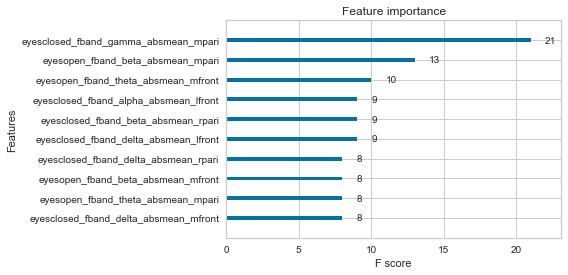

In [163]:
plot_importance(xgbr, max_num_features=10)
pyplot.show()